In [1]:
from __future__ import print_function
from __future__ import absolute_import
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

Pysaliency
==========

Saliency Map Models
----------------------

`pysaliency` comes with a variety of features to evaluate saliency map models. This notebooks demonstrates these features.

First we load the MIT1003 dataset:

In [2]:
import sys
import pysaliency
from pysaliency.external_datasets.sjtuvis import TextDescriptor

data_location = "../../datasets/test"
text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
print(text_descriptor.get_description('000000020777_2.png')) 
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis("../../datasets/test/original_sjtuvis_dataset", location=data_location, text_descriptor=text_descriptor)

A fireman stood at the top of the ladder


As some evaluation methods can take quite a long time to run, we prepare a smaller dataset consisting of only the first 10 stimuli:

We will use the saliency model *AIM* by Bruce and Tsotos

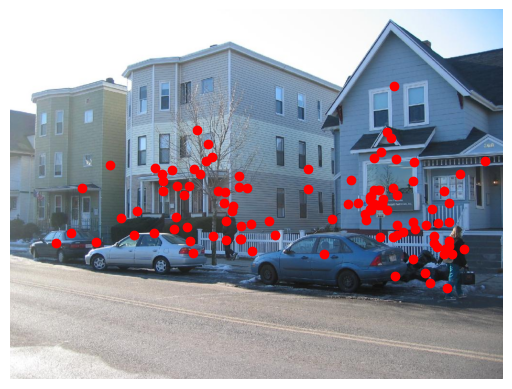

In [3]:
data_location = "../../datasets"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_mit1003(location=data_location)
index = 10
plt.imshow(mit_stimuli.stimuli[index])
f = mit_fixations[mit_fixations.n == index]
plt.scatter(f.x, f.y, color='r')
_ = plt.axis('off')
cutoff = 20

# model = pysaliency.external_models.AIM(location="../../models/", 	cache_location=os.path.join('../../models/model_caches', 'AIM'), caching=True)
# text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
# mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis(original_dataset_path="../../datasets/test/original_sjtuvis_dataset", location='../../datasets', text_descriptor=text_descriptor)
# cutoff = 10
# short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
# short_fixations = mit_fixations[mit_fixations.n < cutoff]
# auc_uniform = model.AUC(short_stimuli, short_fixations, nonfixations='uniform', verbose=True)
# auc_shuffled = model.AUC(short_stimuli, short_fixations, nonfixations='shuffled', verbose=True)
# auc_identical_nonfixations = model.AUC(short_stimuli, short_fixations, nonfixations=short_fixations, verbose=True)
# kl_uniform = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='uniform')
# kl_shuffled = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='shuffled')
# kl_identical = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations=short_fixations)
# nss = model.NSS(short_stimuli, short_fixations)
# gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
# image_based_kl = model.image_based_kl_divergence(short_stimuli, gold_standard)
# cc = model.CC(short_stimuli, gold_standard)
# ssim = model.SIM(short_stimuli, gold_standard)
# print("AUC Uniform: ", auc_uniform, "AUC Shuffled: ", auc_shuffled, "AUC Identical: ", auc_identical_nonfixations, "KL Uniform: ", kl_uniform, "KL Shuffled: ", kl_shuffled, "KL Identical: ", kl_identical, "NSS: ", nss, "Image Based KL: ", image_based_kl, "CC: ", cc, "SSIM: ", ssim)

from pysaliency.external_datasets.sjtuvis import TextDescriptor
text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
data_location = "../../datasets/test"
original_dataset_path = "../../datasets/test/original_sjtuvis_dataset"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis(original_dataset_path=original_dataset_path, location=data_location, text_descriptor = text_descriptor)
short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
short_fixations = mit_fixations[mit_fixations.n < cutoff]

# gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
# image_based_kl = aim.image_based_kl_divergence(short_stimuli, gold_standard)
    

# import matplotlib.pyplot as plt


# smap = aim.saliency_map(mit_stimuli[10])
# print(smap.shape, mit_stimuli[10].shape, type(smap), smap.shape, np.min(smap), np.max(smap))

# plt.imshow(image)
# plt.axis('off')
# plt.show()

# plt.imshow(-smap)
# print(smap.shape, mit_stimuli[10].shape, type(smap), smap.shape, np.min(smap), np.max(smap))
# plt.axis('off')

# num_rows = 2
# num_cols = 3
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))0
# for i, ax in enumerate(axes.flat):
#     index = i  # Replace with your desired index
#     image = mit_stimuli.stimuli[index]
#     print(image.shape)
#     saliency_map = aim.saliency_map(image)
#     # ax.imshow(image)
#     ax.axis('off')
#     ax.imshow(-saliency_map)
# plt.tight_layout()
# plt.show()

Lavis text guided saliency model. Loaded from the lavis module. 😎 😎 😎

2023-12-14 12:28:45.640 | INFO     | lavis.models:load_model_and_preprocess:152 - Loading the preprocessors from the default config file...
2023-12-14 12:28:45.641 | INFO     | lavis.models:load_model_and_preprocess:153 - args:{'model': {'arch': 'blip_image_text_matching', 'load_finetuned': True, 'finetuned': 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_retrieval_coco.pth', 'vit_type': 'large', 'vit_grad_ckpt': False, 'vit_ckpt_layer': 0, 'image_size': 384, 'med_config_path': 'configs/models/med_large_config.json', 'embed_dim': 256}, 'preprocess': {'vis_processor': {'eval': {'name': 'blip_image_eval', 'image_size': 384}}, 'text_processor': {'eval': {'name': 'blip_caption'}}}}
2023-12-14 12:28:45.642 | INFO     | lavis.models:load_preprocess:96 - Visual pretrained model: {'eval': {'name': 'blip_image_eval', 'image_size': 384}} | Text pretrained model: {'eval': {'name': 'blip_caption'}}
Using cache found in /mnt/homes/minghao/.cache/torch/hub/pytor

(369, 640) float32 1.0 0.0
(369, 640) float32 0.63310486 0.0034721235
(480, 640) float32 1.0 0.0
(480, 640) float32 0.72685164 0.00021763737
(612, 612) float32 1.0 0.0
(612, 612) float32 0.8294782 0.0010506859
(480, 640) float32 1.0 0.0
(480, 640) float32 0.57371837 0.0042276504
(640, 595) float32 1.0 0.0
(640, 595) float32 0.5419062 0.0014589059


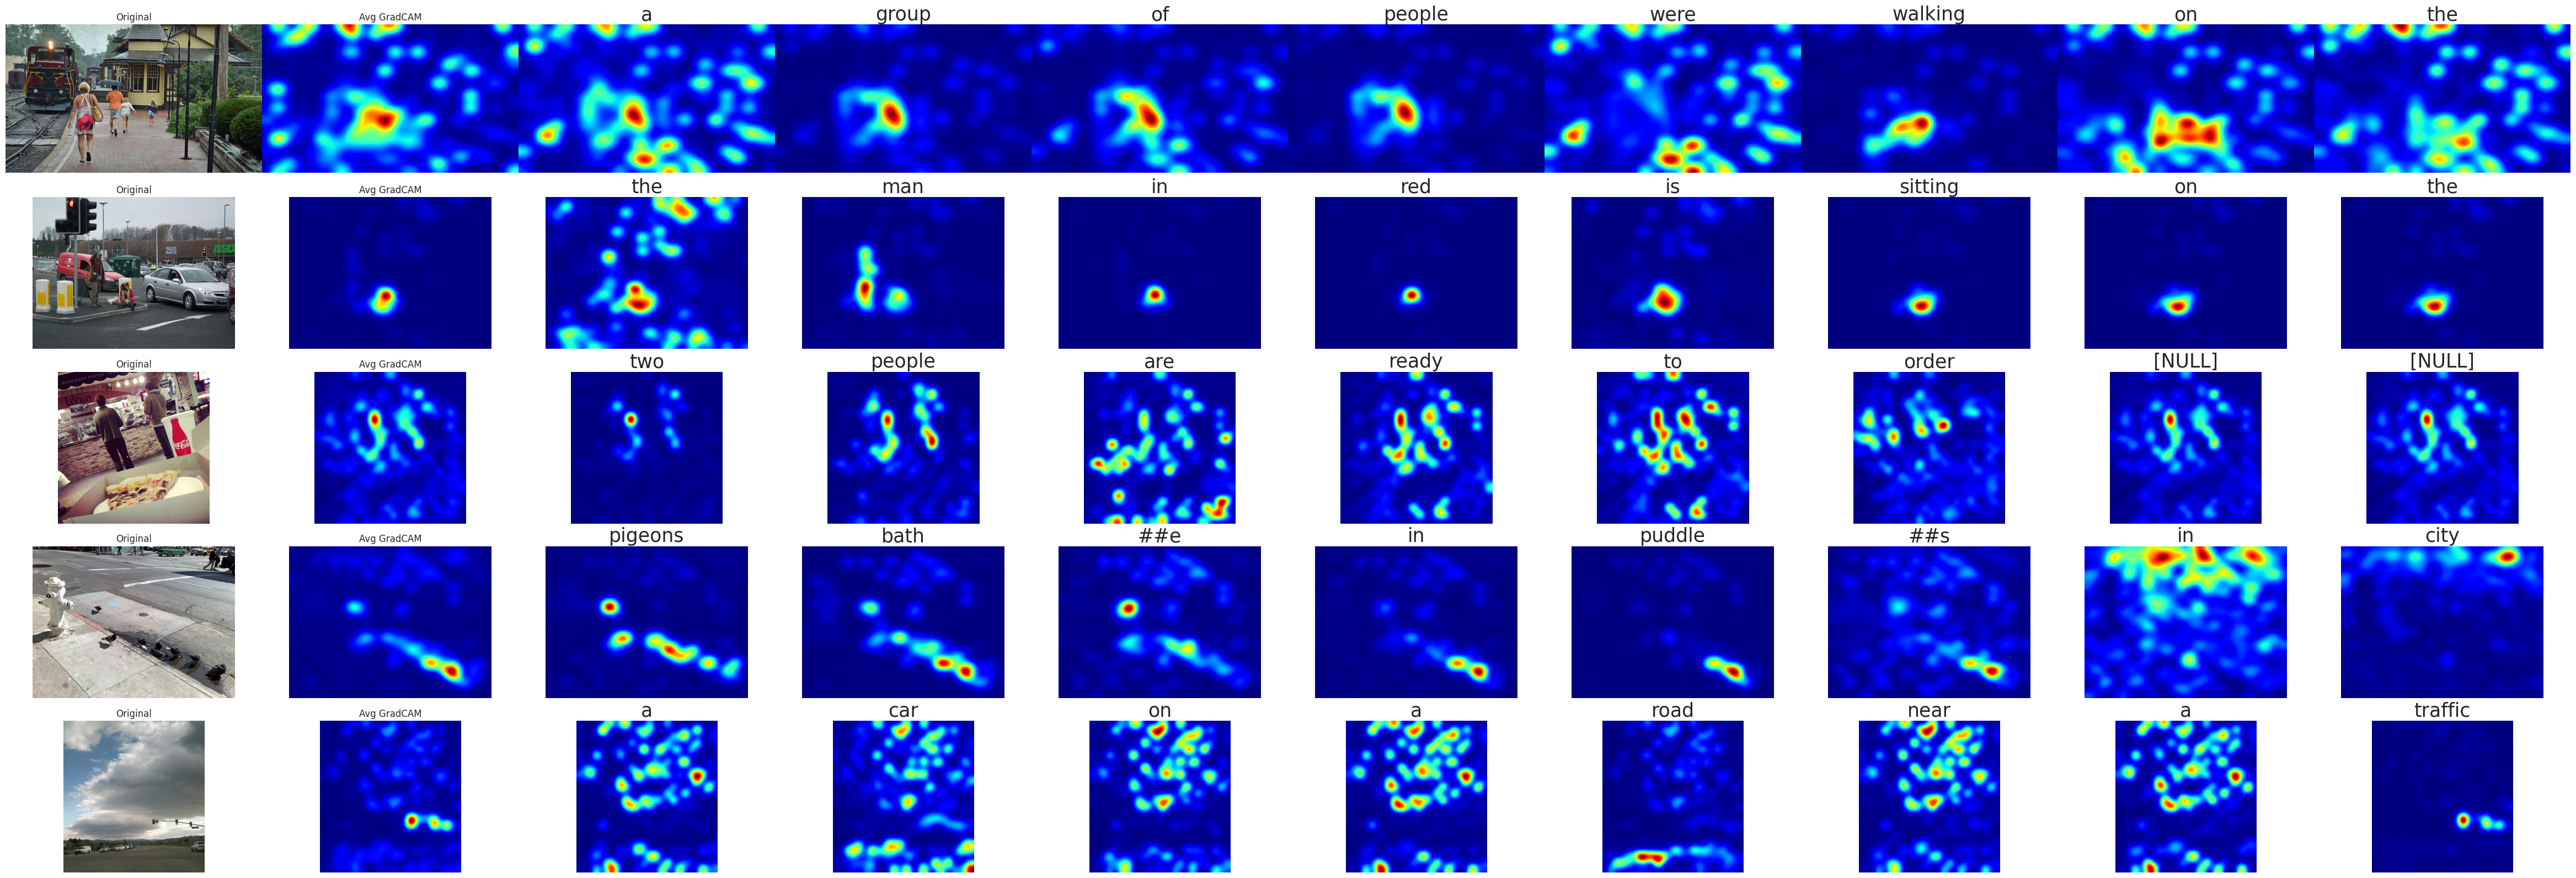

In [7]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np
from pysaliency.datasets import Stimulus, Fixations,  StimuliStimulus
import pysaliency

def handle_stimulus(stimulus):
	"""
	Make sure that a stimulus is a `Stimulus`-object
	"""
	if not isinstance(stimulus, Stimulus):
		stimulus = Stimulus(stimulus)
	return stimulus

import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch    
from typing import Optional, Tuple, List, Dict, Any, Union, Sequence
import pysaliency
import re

DEVICE = 'cuda'

class DeepGazeSaliencyModel(pysaliency.SaliencyMapModel):
	
	def __init__(self, block_num=7, dst_w=720, version = 1):
		super().__init__()
		if version == 1:
			self.model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)
			self.use_hist_scan_path = False
		elif version == 2:
			self.model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)
			self.use_hist_scan_path = False
		elif version == 3:
			self.model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)
			self.use_hist_scan_path = True
		self.block_num = block_num
		self.dst_w = dst_w
		
	def _saliency_map(self, stimulus, text_description:Optional[str]=None):
		image = stimulus
		# print("The input image....")
		# print(image.shape, image.dtype, np.min(image), np.max(image))
		fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
		fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

		centerbias_template = np.load('../../pretrained_weights/deepgaze/centerbias_mit1003.npy')
		centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
		centerbias -= logsumexp(centerbias)

		image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
		centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

		if self.use_hist_scan_path:
			x_hist_tensor = torch.tensor([fixation_history_x[self.model.included_fixations]]).to(DEVICE)
			y_hist_tensor = torch.tensor([fixation_history_y[self.model.included_fixations]]).to(DEVICE)
			log_density_prediction = self.model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)
		else:
			log_density_prediction = self.model(image_tensor, centerbias_tensor)

		# f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
		# axs[0].imshow(image)
		# axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
		# axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
		# axs[0].set_axis_off()
		# axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
		# axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
		# axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
		# axs[1].set_axis_off()
		if log_density_prediction.dim() == 2:
			pass
		elif log_density_prediction.dim() == 4:
			log_density_prediction = log_density_prediction[0, 0]
		elif log_density_prediction.dim() == 3:
			print(log_density_prediction.shape)
			assert log_density_prediction.shape[0] == 1
			log_density_prediction = log_density_prediction[0]
		assert log_density_prediction.dim() == 2, "log_density_prediction should be a 3D tensor, but is {}".format(log_density_prediction.shape)
		return log_density_prediction.detach().cpu().numpy()

def contains_non_alphabetic(word):
	pattern = r'[^a-z]'
	return bool(re.search(pattern, word))


class LavisTextGuidedSaliencyModel(pysaliency.SaliencyMapModel):
	
	def __init__(self, debug_vis_flag = False, cache_location=None, caching=True, memory_cache_size=None):
		super().__init__(cache_location, caching, memory_cache_size)
		self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
		self.model, self.vis_processors, self.text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=self.device, is_eval=True)
		self.debug_vis_flag = debug_vis_flag
		self.deepgaze_model = DeepGazeSaliencyModel(version=3)
		
	def saliency_map(self, stimulus):
		"""
		Get saliency map for given stimulus.

		To overwrite this function, overwrite `_saliency_map` as otherwise
		the caching mechanism is disabled.
		"""
		if isinstance(stimulus, StimuliStimulus):
			filename = os.path.basename(stimulus.filename)
		elif isinstance(stimulus, Stimulus):
			filename = None
		elif isinstance(stimulus, np.ndarray):
			filename = None
		else:
			raise NotImplementedError
		stimulus = handle_stimulus(stimulus)
			
		try:
			text_description=text_descriptor.get_description(filename)
		except Exception as e:
			text_description=None
		# print(text_description, stimulus.filename)
		if text_description is None:
			return self.deepgaze_model.saliency_map(stimulus.stimulus_data)
		else:
			# print(text_description)
			pass
		if not self.caching:
			return self._saliency_map(stimulus.stimulus_data, text_description=text_description)
		stimulus_id = stimulus.stimulus_id
		if not stimulus_id in self._cache:
			temp = stimulus.stimulus_data
			self._cache[stimulus_id] = self._saliency_map(temp, text_description=text_description)
		return self._cache[stimulus_id]
	
	def _saliency_map(self, stimulus, text_description=None):
		
		# print(f"****************      {text_description}      *********************")
		
		return self.evaluate_saliency_map(stimulus[...,:3], "large", text_description)
	
	def evaluate_saliency_map(self, raw_image, model_path, caption, block_num=7, dst_w=720):
		# print(raw_image.shape, raw_image.dtype, np.max(raw_image), np.min(raw_image))
		raw_image = Image.fromarray(np.uint8(raw_image)).convert('RGB')
		norm_img = np.float32(raw_image) / 255

		# Preprocess image and text inputs
		img = self.vis_processors["eval"](raw_image).unsqueeze(0).to(self.device)
		txt = self.text_processors["eval"](caption)

		# Compute GradCam
		txt_tokens = self.model.tokenizer(txt, return_tensors="pt").to(self.device)
		gradcam, _ = compute_gradcam(self.model, img, txt, txt_tokens, block_num=block_num)

		# Average GradCam for the full image
		avg_gradcam = getAttMap(norm_img, gradcam[0][1], blur=True, overlap=False)
		
		if self.debug_vis_flag:
			fig, ax = plt.subplots(1, 1, figsize=(10, 10))
			ax.imshow(avg_gradcam)
			ax.set_yticks([])
			ax.set_xticks([])

		overall_gradcam_wrt_tokens = [avg_gradcam]
		
		num_image = len(txt_tokens.input_ids[0]) - 2 + 1
		if self.debug_vis_flag:
			fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

		gradcam_iter = iter(gradcam[0][2:-1])
		token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

		tokens = []
		for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
			word = self.model.tokenizer.decode([token_id])
			tokens.append(word)
			gradcam_image = getAttMap(norm_img, gradcam, blur=True, overlap=False)
			overall_gradcam_wrt_tokens.append(gradcam_image)
			if self.debug_vis_flag:
				ax[i].imshow(gradcam_image)
				ax[i].set_yticks([])
				ax[i].set_xticks([])
				ax[i].set_xlabel(word)

		overall_gradcam_wrt_tokens = np.stack(overall_gradcam_wrt_tokens, axis =0)
		avg_gradcam_wrt_tokens = np.mean(overall_gradcam_wrt_tokens, axis=0)
		
		if self.debug_vis_flag:
			ax[num_image-1].imshow(avg_gradcam_wrt_tokens)
			ax[num_image-1].set_yticks([])
			ax[num_image-1].set_xticks([])
			ax[num_image-1].set_xlabel(caption)
			
			plt.show()
			
		print(avg_gradcam.shape, avg_gradcam.dtype, np.max(avg_gradcam), np.min(avg_gradcam))
		print(avg_gradcam_wrt_tokens.shape, avg_gradcam_wrt_tokens.dtype, np.max(avg_gradcam_wrt_tokens), np.min(avg_gradcam_wrt_tokens))
		return overall_gradcam_wrt_tokens, tokens


model: pysaliency.SaliencyMapModel = LavisTextGuidedSaliencyModel(debug_vis_flag=False)
overall_num_tokens = 8
num_rows = 5  # Number of images to display
fig, axes = plt.subplots(num_rows, overall_num_tokens + 2, figsize=(60, 20))  # Adjust figsize as needed

offset = 1500




for idx in range(num_rows):
	stimulus = mit_stimuli[4 * idx + offset]
	raw_image = Image.fromarray(stimulus.stimulus_data)
	caption = text_descriptor.get_description(os.path.basename(stimulus.filename))

	# Generate saliency maps
	smap, tokens = model.saliency_map(stimulus)

	num_tokens = len(smap) - 1  # Subtract 1 for the average GradCAM

	ax = axes[idx]
	# Display the original image
	ax[0].imshow(raw_image)
	ax[0].set_title("Original")
	ax[0].axis('off')

	# Display the average GradCAM
	ax[1].imshow(smap[0], cmap='jet')
	ax[1].set_title("Avg GradCAM")
	ax[1].axis('off')

	# Display each token-specific GradCAM
	for i in range(min(num_tokens, overall_num_tokens)):
		ax[i + 2].imshow(smap[i + 1], cmap='jet')  # Adjust index for avg_gradcam
		
		title = ax[i + 2].set_title(f"{tokens[i]}", fontsize=25)
		title.set_y(1.05)
		title.set_multialignment('center')
		title.set_linespacing(1.5)
	
		ax[i + 2].axis('off')
	for i in range(num_tokens, overall_num_tokens):
		title = ax[i + 2].set_title(f"[NULL]", fontsize=25)
		title.set_y(1.05)
		title.set_multialignment('center')
		title.set_linespacing(1.5)
	
		ax[i + 2].imshow(smap[0], cmap='jet')
		ax[i + 2].axis('off')

plt.subplots_adjust(wspace=0, hspace=0.15)  # Remove gaps between subplots
plt.show()


To implement you own saliency map model, inherit from `pysaliency.SaliencyMapModel` and implement the `_saliency_map` method.